# Анализ сервиса аренды самокатов

Цель исследования:

1. Определить частоту, встречаемости городов, соотношение пользователей с подпиской и без подписки, возраст пользователей, расстояние и продолжительность поездок.

2. Понять, тратят ли пользователи с подпиской больше времени на поездки? 

3. Проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

4. Решить задачу: Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ход исследования:

1.Импортировать библиотеки;

2.Импортировать датасеты, изучить информацию о них;

3.Преобработать данные;

4.Добавить столбцы в датасет исходя из анализа информации в нем;

5.Опиcать и визуализировать общую информацию о пользователях и поездках;

6.Объеденить данные о пользователях, поездках и подписках в один датафрейм;

7.Создать дополнительные датафреймы по пользователям разных категорий;

8.Визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий;

9.Создать датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными ранее данными;

10.Найти суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц;

11.Понять, тратят ли пользователи с подпиской больше времени на поездки на основании T-теста;

12.Проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки;

13.Решить задачу;

14.Написать общий вывод.

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
from math import factorial

#### Шаг 1. Загрузка данных

Импортируем датасеты.

In [2]:
users = pd.read_csv('/datasets/users_go.csv')

In [3]:
rides = pd.read_csv('/datasets/rides_go.csv')

In [4]:
subs = pd.read_csv('/datasets/subscriptions_go.csv')

In [5]:
display(users.head(10))
display(rides.head(10))
display(subs.head(10))

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [6]:
display(users.info())
display(rides.info())
display(subs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

Необходимо столбец date таблицы rides перевести в формат datetime, создать столбец month

#### Шаг 2. Предобработка данных

 Приведим столбец date к типу даты pandas.

In [7]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

Создаем новый столбец с номером месяца на основе столбца date.

In [8]:
rides['month'] = rides['date'].dt.month

In [9]:
rides['date'].dt.year.unique()

array([2021])

Данные за 2021 год

Проверяем наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.

In [10]:
display(rides.head(10))

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


In [11]:
users.duplicated().sum()

31

In [12]:
users.drop_duplicates(inplace=True)

In [13]:
users.duplicated().sum()

0

In [14]:
rides.duplicated().sum()

0

In [15]:
subs.duplicated().sum()

0

In [16]:
users.isna().sum().sort_values(ascending=False)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [17]:
rides.isna().sum().sort_values(ascending=False)

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [18]:
subs.isna().sum().sort_values(ascending=False)

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

# Вывод:

Пропущенных данных в таблицах нет.

Дубликаты имеются среди пользователей, удалил строки дубликаты.

Добавил столбец month с номер месяца.

#### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:
1 частота встречаемости городов;
2 соотношение пользователей с подпиской и без подписки;
3 возраст пользователей;
4 расстояние, которое пользователь преодолел за одну поездку;
5 продолжительность поездок.

In [19]:
users_by_city = users['city'].value_counts()
print(users_by_city)

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


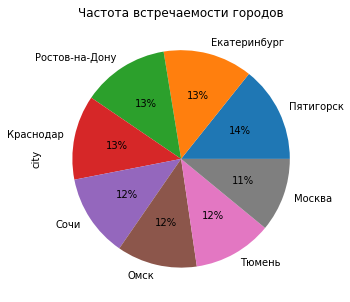

In [20]:
users['city'].value_counts().plot(
    kind = 'pie', 
    y = users_by_city,
    autopct = '%1.0f%%',
    figsize=(5,5), 
    title = 'Частота встречаемости городов');

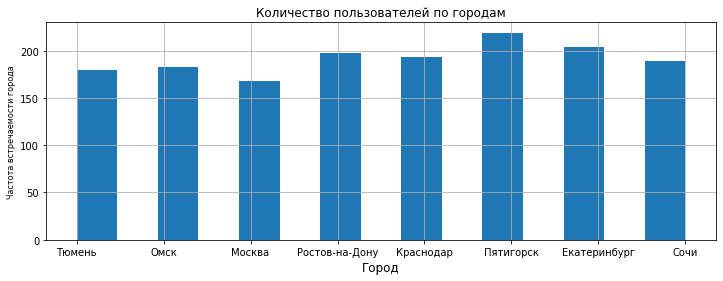

In [21]:
plt.hist(users['city'], bins = 15)
plt.gcf().set_size_inches(12, 4)
plt.title('Количество пользователей по городам')
plt.xlabel('Город', size = 12)
plt.ylabel('Частота встречаемости города', size = 8)
plt.grid()
plt.show()

Можем заметить, что города Пятгорск и Екатеринбург являются самыми часто встречающимися, а Москва и Тюмень самыми редкими.

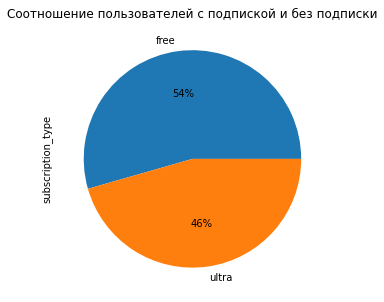

In [22]:
users['subscription_type'].value_counts().plot(
    kind = 'pie', 
    autopct = '%1.0f%%', 
    figsize=(5,5),
    title = 'Соотношение пользователей с подпиской и без подписки');

In [23]:
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

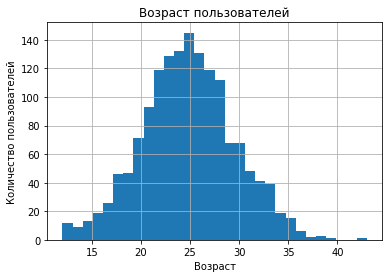

In [24]:
plt.hist(users['age'], bins = 30)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [25]:
users['age'].mean()

24.903520208604956

Можем заметить, что средний возраст пользователей 25 лет

In [26]:
users['age'].value_counts().sort_values(ascending = True)

43      1
39      1
37      2
38      3
12      4
36      6
13      8
14      9
15     13
35     15
16     19
34     19
17     26
33     39
32     41
18     46
19     47
31     48
29     68
30     68
20     71
21     93
28    112
22    119
27    119
23    129
26    131
24    132
25    145
Name: age, dtype: int64

Самыми младшими являются пользователи 12, 13 лет.

Самыми старшими - 43, 39.

Основной возрастной диапазон от 20 до 30 лет.


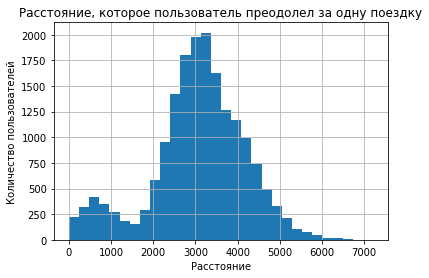

In [27]:
plt.hist(rides['distance'], bins = 30)
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [28]:
rides['distance'].min()

0.855682925681208

In [29]:
rides['distance'].max()

7211.007744598519

Самая короткая дистанция - 0.86 км, а самая длинная - 7.2 км

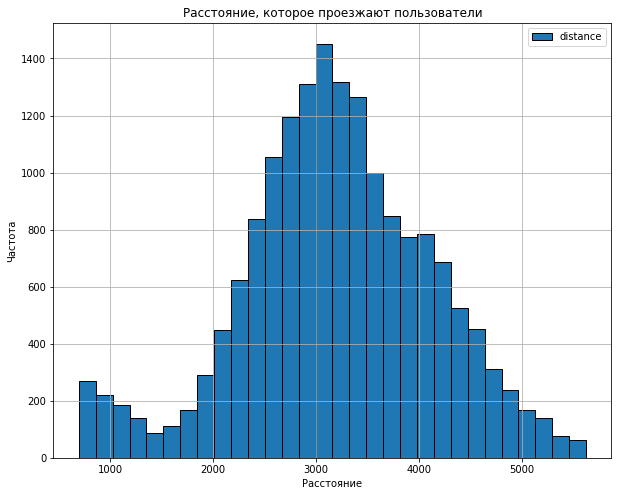

In [30]:
q1 = rides['distance'].quantile(.25)
q3 = rides['distance'].quantile(.75) 
iqr = q3 - q1 # межквартильный размах IQR
rides['distance'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние, которое проезжают пользователи')
plt.xlabel('Расстояние')
plt.ylabel('Частота')
plt.show()

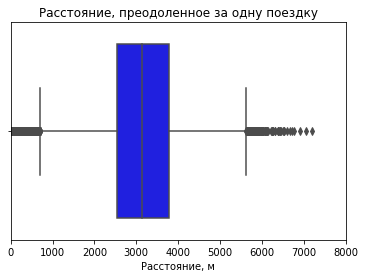

In [31]:
sns.boxplot(x=rides['distance'], color='blue')
plt.title('Расстояние, преодоленное за одну поездку')
plt.xlabel('Расстояние, м')
_ = plt.xlim(0, 8000)

Основной диапазон дистанций от 2.5 км до 4 км.

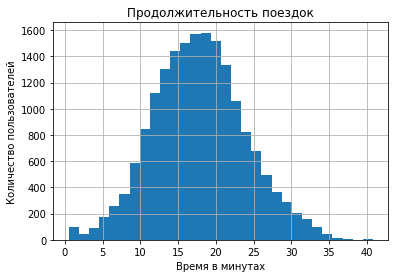

In [32]:
plt.hist(rides['duration'], bins = 30)
plt.title('Продолжительность поездок')
plt.xlabel('Время в минутах')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Text(0.5, 0, 'Время в минутах')

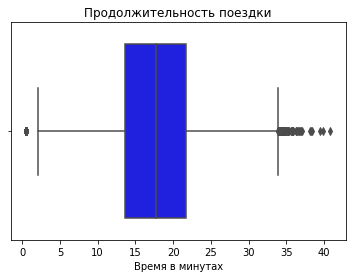

In [33]:
sns.boxplot(x=rides['duration'], color='blue')
plt.title('Продолжительность поездки')
plt.xlabel('Время в минутах')


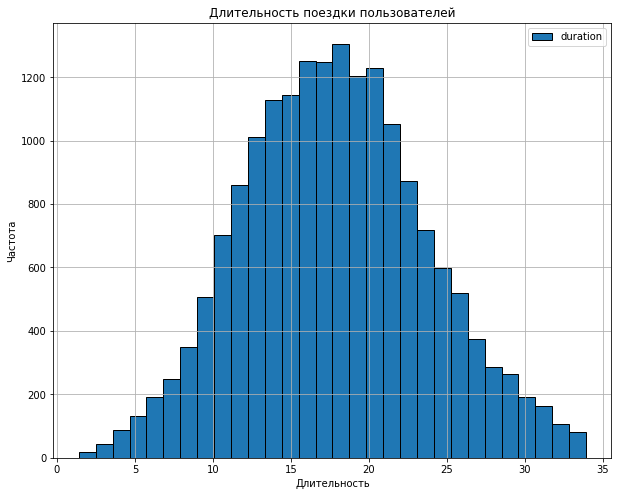

In [34]:
q1 = rides['duration'].quantile(.25)
q3 = rides['duration'].quantile(.75) 
iqr = q3 - q1 # межквартильный размах IQR
rides['duration'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Длительность поездки пользователей')
plt.xlabel('Длительность')
plt.ylabel('Частота')
plt.show()


Основной диапазон длительности поездки 13 - 22 минут.

In [35]:
rides['duration'].min()

0.5

In [36]:
rides['duration'].max()

40.82396261922424


Самые короткие поездки длятся пол минуты.

Самая длинная поездка заняла 40 минут.


# Вывод:

Количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидерами по количеству пользователей является Пятигорск и Екатеринбург. Меньше всего пользователей в Тюмени и Москве.

Пользователей, использующих подписку free 835 человек, что является 54% от общего числа пользователей. 

На подписке ultra сидит 699 пользователей, что соответственно является 46%.

Самыми младшими являются пользователи 12, 13 лет.

Самыми старшими - 43, 39.

Основной возрастной диапазон от 20 до 30 лет.

Самая короткая дистанция - 0.86 км

Самая длинная - 7.2 км

Основной диапазон дистанций от 2.5 км до 4 км.

Самые короткие поездки длятся пол минуты. Выглядит как выброс.

Самая длинная поездка заняла 40 минут.

Основной диапазон длительности поездки 13 - 22 минут.

#### Шаг 4. Объединение данных

Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого будет использован метод merge().
Создадим ещё два датафрейма из датафрейма, созданного раннее
c данными о пользователях без подписки
с данными о пользователях с подпиской.
Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

In [37]:
rides.shape

(18068, 5)

In [38]:
subs.shape

(2, 4)

In [39]:
users.shape

(1534, 5)

Размер датасетов составляет: 
    
rides = 18068 строк и 9 столбцов

subs = 2 строк и 4 столбцов

users = 1534 строк и 5 столбцов

In [40]:
df = users.merge(rides)

In [41]:
data = df.merge(subs)

In [42]:
data.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [43]:
data.isna().sum().sort_values(ascending=False)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [44]:
data['duration'] = np.ceil(data['duration'])

In [45]:
data.shape

(18068, 12)

Размер объедененного датафрейма data:
rides = 18068 строк и 12 столбцов

In [46]:
subscribed = data[df['subscription_type'] == 'ultra']

In [47]:
notsubscribed = data[df['subscription_type'] == 'free']

Text(0.5, 0, 'Время в минутах')

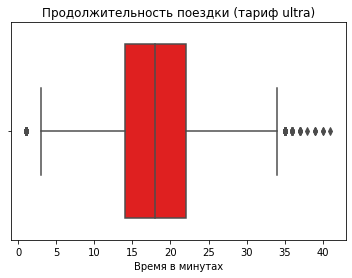

In [48]:
sns.boxplot(x=data['duration'], color='red')
plt.title('Продолжительность поездки (тариф ultra)')
plt.xlabel('Время в минутах')

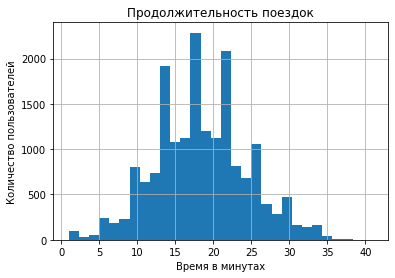

In [49]:
plt.hist(data['duration'], bins = 30)
plt.title('Продолжительность поездок')
plt.xlabel('Время в минутах')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Text(0.5, 0, 'Время в минутах')

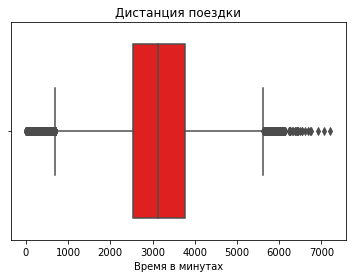

In [50]:
sns.boxplot(x=data['distance'], color='red')
plt.title('Дистанция поездки')
plt.xlabel('Время в минутах')

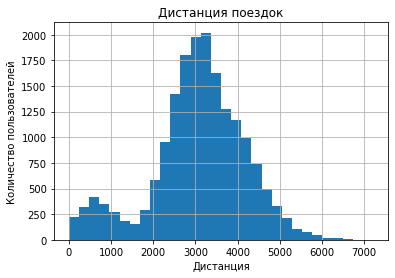

In [51]:
plt.hist(data['distance'], bins = 30)
plt.title('Дистанция поездок')
plt.xlabel('Дистанция')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Text(0.5, 0, 'Время в минутах')

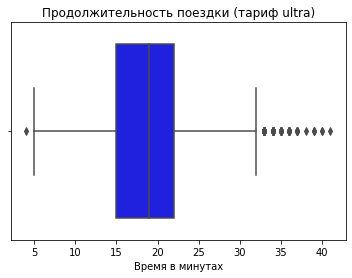

In [52]:
sns.boxplot(x=subscribed['duration'], color='blue')
plt.title('Продолжительность поездки (тариф ultra)')
plt.xlabel('Время в минутах')


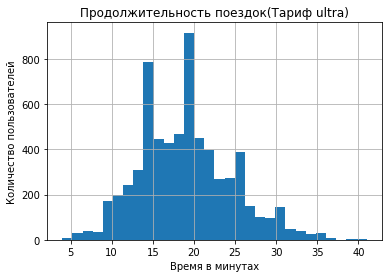

In [53]:
plt.hist(subscribed['duration'], bins = 30)
plt.title('Продолжительность поездок(Тариф ultra)')
plt.xlabel('Время в минутах')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Text(0.5, 0, 'расстояние в метрах')

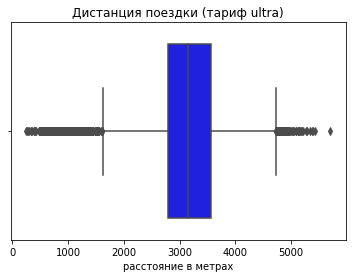

In [54]:
sns.boxplot(x=subscribed['distance'], color='blue')
plt.title('Дистанция поездки (тариф ultra)')
plt.xlabel('расстояние в метрах')

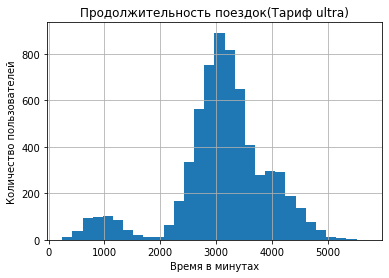

In [55]:
plt.hist(subscribed['distance'], bins = 30)
plt.title('Продолжительность поездок(Тариф ultra)')
plt.xlabel('Время в минутах')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Text(0.5, 0, 'Время в минутах')

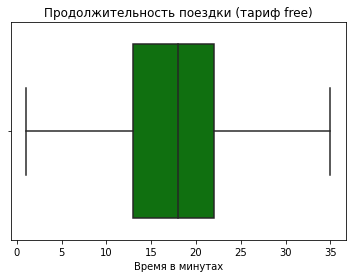

In [56]:
sns.boxplot(x=notsubscribed['duration'], color='green')
plt.title('Продолжительность поездки (тариф free)')
plt.xlabel('Время в минутах')

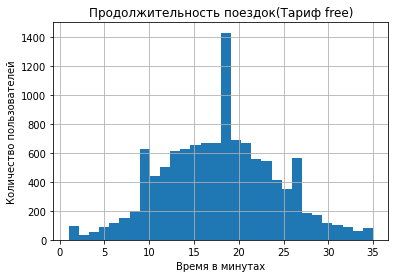

In [57]:
plt.hist(notsubscribed['duration'], bins = 30)
plt.title('Продолжительность поездок(Тариф free)')
plt.xlabel('Время в минутах')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Text(0.5, 0, 'расстояние в метрах')

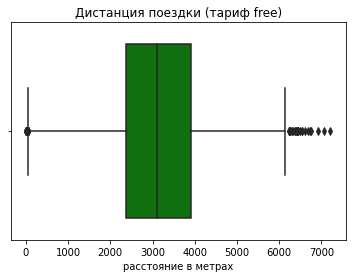

In [58]:
sns.boxplot(x=notsubscribed['distance'], color='green')
plt.title('Дистанция поездки (тариф free)')
plt.xlabel('расстояние в метрах')

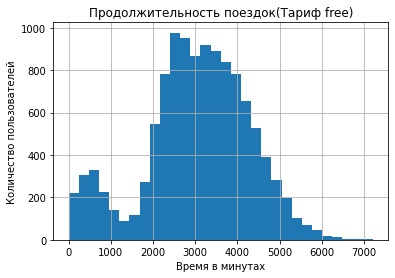

In [59]:
plt.hist(notsubscribed['distance'], bins = 30)
plt.title('Продолжительность поездок(Тариф free)')
plt.xlabel('Время в минутах')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

# Вывод:

Создали объедененный датафрейм data

Тариф free: В основном время укладывается в промежуток от 15 до 23 минути и проезжают от 2.8 до 3.5 км

Тариф ultra: В основном время укладывается в промежуток от 13 до 22 минути и проезжают от 2.2 до 4 км

Таким образом, можно сделать вывод, что пользователи с бесплатным тарифом в целом совершают более долгие поездки, но  проезжают меньшее расстояние, чем пользователи на платном тарифе.

#### Шаг 5. Подсчёт выручки

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными ранее данными. 
Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки.


In [60]:
data1 = pd.pivot_table(data,
                           index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len, 
                                      'subscription_type' : min})

In [61]:
data1.rename(columns = {'name' : 'count_tips'}, inplace = True)

In [62]:
data1.sort_values(by='month').head(20)

distance  duration  count_tips subscription_type
month user_id                                                      
1     1         7027.511294      42.0           2             ultra
      1061     12637.249630      43.0           3              free
      1063      3276.362299      10.0           1              free
      1064      5297.324649      15.0           1              free
      1065     14547.099333      99.0           4              free
      1066      2809.064949      19.0           1              free
      1067      3864.900780      22.0           1              free
      1069      7007.076943      53.0           3              free
      1071      3635.094136      15.0           1              free
      1072      2498.615999      11.0           1              free
      1073      2945.802455      16.0           1              free
      1074      2814.793386      22.0           1              free
      1075      5746.745124      29.0           3              free
      1077       114.036199      13.0           1              free
      1078      3748.219563      19.0           1              free
      1082      7250.124895      30.0           2              free
      1083      5848.881463      31.0           2              free
      1084      4615.097141      25.0           1              free
      1085     11410.546346      63.0           3              free
      1086      4044.280322      18.0           1              free

In [63]:
data1.query('user_id == 1')

,,distance,duration,count_tips,subscription_type
month,user_id,,,,
1,1,7027.511294,42.0,2,ultra
4,1,754.159807,7.0,1,ultra
8,1,6723.470560,46.0,2,ultra
10,1,5809.911100,32.0,2,ultra
11,1,7003.499363,56.0,3,ultra
12,1,6751.629942,28.0,2,ultra


In [64]:
def revenue(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['count_tips']
    else:
        return 'Нету подписки'

In [65]:
data1['revenue_per_month'] = data1.apply(revenue, axis=1)

In [66]:
data1['revenue_per_month'].head(10)

month  user_id
1      1          451.0
       3          277.0
       5          277.0
       7          367.0
       12         397.0
       13         451.0
       14         409.0
       15         433.0
       20         373.0
       22         277.0
Name: revenue_per_month, dtype: float64

In [67]:
data1.query('user_id == 1')

,,distance,duration,count_tips,subscription_type,revenue_per_month
month,user_id,,,,,
1,1,7027.511294,42.0,2,ultra,451.0
4,1,754.159807,7.0,1,ultra,241.0
8,1,6723.470560,46.0,2,ultra,475.0
10,1,5809.911100,32.0,2,ultra,391.0
11,1,7003.499363,56.0,3,ultra,535.0
12,1,6751.629942,28.0,2,ultra,367.0


# Вывод:

Создали новый датафрейм data1 с агрегированными данными  на основе датафрейма с объединенными данными data.
Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.

#### Шаг 6. Проверка гипотез

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу.
Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

H_0: Время (duration) пользователей на подписке ultra = время (duration) пользователей на подписке free

H_1: Время (duration) пользователей на подписке ultra > время (duration) пользователей на подписке free

alpha = 0.05

In [68]:
ultra = subscribed['duration'] 

free = notsubscribed['duration']

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

2.4959453720736625e-34
Отвергаем нулевую гипотезу


Проверили гипотезу, отвергли гипотезу о том, что время поездки пользователей на тарифе ultra равно времени поездки пользователей на тарифе free.

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.
Проверим гипотезу: пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.

H_0: Расстояние (distance) пользователей на подписке ultra = 3130 метров

H_1: Расстояние (distance) пользователей на подписке ultra < 3130 метров

alpha = 0.05

In [69]:
ultra_dist = subscribed['distance']

interested_value = 3130.0

alpha = 0.05

results = st.ttest_1samp(
    ultra_dist, 
    interested_value,
    alternative='greater')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


Проверили гипотезу, и мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra не превышает 3130 метров.

6.3
Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Проверим гипотезу: помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

H_0: Выручка (revenue_per_month) пользователей на подписке ultra = выручка (revenue_per_month) пользователей на подписке free

H_1: Выручка (revenue_per_month) пользователей на подписке ultra > выручка (revenue_per_month) пользователей на подписке free

alpha = 0.05

In [70]:
ultra_per_mnth = data1.loc[data1.subscription_type == 'ultra', 'revenue_per_month'] 

free_per_mnth = data1.loc[data1.subscription_type == 'free', 'revenue_per_month'] 


results = st.ttest_ind(ultra_per_mnth, 
                       free_per_mnth,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


Проверили гипотезу, соответственно, мы можем утверждать, что выручка с пользователей на подписке ultra превышает выручку с пользователей на подписке free

6.4
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ:

Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок.

Гипотезы будут сформулированы так:

H0 : u1 = u2
H1 : u1 != u2
где u1 и u2 - средние значения количество обращений в техподдержку до и после изменения.

Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel()

#### Шаг 7. Распределения

# Общий вывод:

Загрузили 3 датафрейма: с пользователями, информацией о поездках, информацией о подписках.

Дальше проверили данные на пропуски, их не оказалось ни в одной таблице. 

Поменяли тип данных у столбца date из датафрейма data_riders к типу даты. 

Также добавили столбец month с номером месяца. 

И удалили дубликаты строк из датафрейма с пользователями.

Провели исследовательский анализ данных:

Вывели, что количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидерами по количеству пользователей является Пятигорск и Екатеринбург. Меньше всего пользователей в Тюмени и Москве.
Пользователей, использующих бесплатную подписку больше 835 человек, что является 54% от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно является 46%.
Возраст пользователей укладывается в промежуток от 20 до 30 лет
В основном пользователи проезжают от 2.5 км до 3.7 км.
Чаще всего длительность поездки состовляет 14 - 23 минут
Объединили данные о пользователях, поездках и подписках в один датафрейм. На основе объединенного датафрейма создали еще 2 датафрейма:

Для пользователей с ultra подпиской
Для пользователей с free подпиской

Дальше визуализировали информацию о расстоянии и времени поездки для пользоватей каждого тарифа.

Тариф free: В основном время укладывается в промежуток от 15 до 23 минути и проезжают от 2.8 до 3.5 км

Тариф ultra: В основном время укладывается в промежуток от 13 до 22 минути и проезжают от 2.2 до 4 км

Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц - вывели все данные в отдельный датафрейм data1. Добавили в датафрейм data1 столбец с помесячной выручкой revenue_per_month.

Проверили гипотезы:

Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе
Отвергли нулевую гипотезу
Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку
Не удалось отвергнуть нулевую гипотезу
Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
Отвергли нулевую гипотезу